## search for candidates in CDIPS sector 7

In [1]:
from chronos.cdips import get_cdips_inventory, get_sector_cam_ccd_from_url

#database
db = get_cdips_inventory()
db.shape #abstract in arxiv paper says 159,343 light curves across 596 distinct clusters 

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Loaded: /home/jp/github/research/project/chronos/chronos/../data/cdips_fits_inventory.txt


(159350,)

In [3]:
#sectors in fits inventory list
db.apply(lambda x: int(x.split("/")[1][1:])).unique()

array([7, 6])

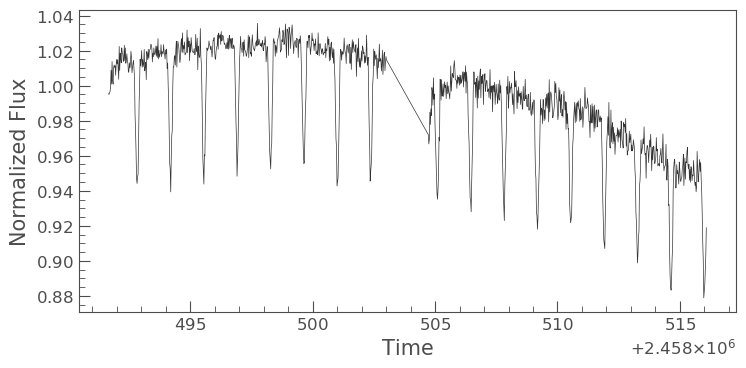

In [6]:
from chronos import CDIPS
from wotan import flatten
from transitleastsquares import transitleastsquares

cdips = CDIPS(gaiaDR2id=3053165639396334848, sector=7, lctype='flux', aper_idx=3, verbose=False)
lc = cdips.lc.remove_outliers()
lc.plot()

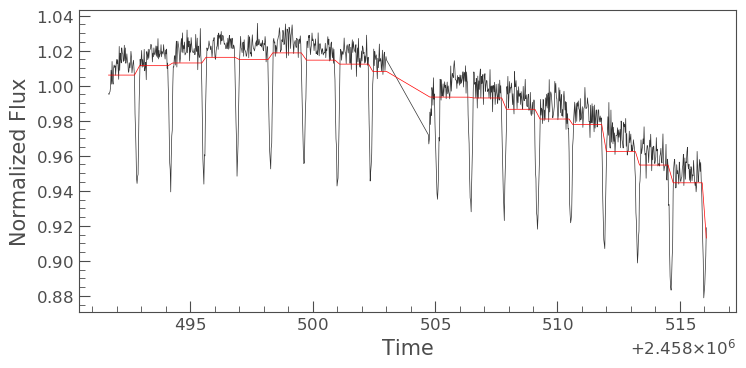

In [37]:
flat, trend = lc.flatten(window_length=101, return_trend=True)
ax = lc.plot()
trend.plot(ax=ax, c='r')

In [26]:
flat_lc, trend_lc = flatten(
    lc.time,                    # Array of time values
    lc.flux,                    # Array of flux values
    method='gp',
    kernel='periodic_auto',  # GP kernel choice
    kernel_size=10,          # GP kernel length
    break_tolerance=0.5,     # Split into segments at breaks longer than that
    robust=True,
    return_trend=True,       # Return trend and flattened light curve
    )

Segment 1 of 2
Segment 2 of 2


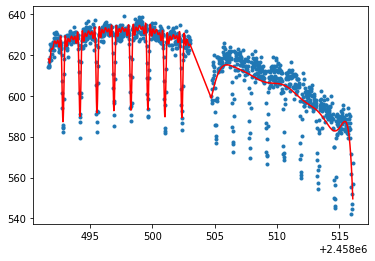

In [27]:
%matplotlib inline
import matplotlib.pyplot as pl

pl.plot(lc.time, lc.flux, '.')
pl.plot(lc.time, trend_lc, 'r-')

In [22]:
flat_lc, trend_lc = flatten(
    lc.time,                    # Array of time values
    lc.flux,                    # Array of flux values
    method='gp',
    kernel='squared_exp',  # GP kernel choice
    kernel_size=10,          # GP kernel length
    break_tolerance=0.5,     # Split into segments at breaks longer than that
    robust=True,
    return_trend=True,       # Return trend and flattened light curve
    )

Segment 1 of 2
Iteration: 1 Rejected outliers: 22
Iteration: 2 Rejected outliers: 13
Iteration: 3 Rejected outliers: 11
Iteration: 4 Rejected outliers: 4
Iteration: 5 Rejected outliers: 2
Iteration: 6 Rejected outliers: 2
Iteration: 7 Rejected outliers: 1
Iteration: 8 Rejected outliers: 0
Converged.
Segment 2 of 2
Iteration: 1 Rejected outliers: 28
Iteration: 2 Rejected outliers: 21
Iteration: 3 Rejected outliers: 12
Iteration: 4 Rejected outliers: 4
Iteration: 5 Rejected outliers: 1
Iteration: 6 Rejected outliers: 1
Iteration: 7 Rejected outliers: 3
Iteration: 8 Rejected outliers: 1
Iteration: 9 Rejected outliers: 0
Converged.


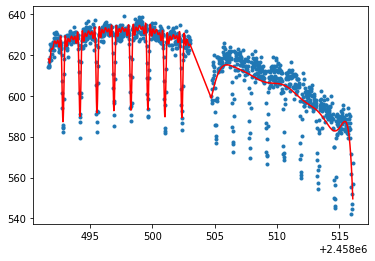

In [28]:
%matplotlib inline
import matplotlib.pyplot as pl

pl.plot(lc.time, lc.flux, '.')
pl.plot(lc.time, trend_lc, 'r-')